<a href="https://colab.research.google.com/github/ismael-almazan/Programaci-n-para-anal-tica-descriptiva-y-predictiva/blob/main/Practica26_263177.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Instrucciones y Objetivos para la Práctica: Regresión Lasso y Ridge**

#### **📌 Objetivos de la Práctica:**  
Al finalizar esta práctica, los estudiantes serán capaces de:  
1. **Realizar un Análisis Exploratorio de Datos (EDA)** completo, incluyendo visualización de distribuciones, detección de outliers y análisis de correlaciones.  
2. **Preprocesar datos** correctamente, manejando valores faltantes, codificando variables categóricas y escalando características.  
3. **Implementar modelos de regresión Lasso y Ridge**, entendiendo cómo la regularización afecta los coeficientes.  
4. **Verificar los supuestos de la regresión lineal** (linealidad, normalidad de residuos, homocedasticidad y multicolinealidad).  
5. **Comparar el rendimiento** de ambos modelos y analizar qué variables son más relevantes en cada caso.  

---

### **📋 Instrucciones**  



#### **🔹 Paso 1: Configuración Inicial**
✅ Carga el set de datos que puedes encontrar en el campus virtual
✅ Ejecutar las celdas de importación de librerías y carga del dataset.  
✅ Familiarizarse con los datos usando `.head()`, `.info()` y `.describe()`.  


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# Carga de set de datos Insirance
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/insurance.csv')

# Descripcion del set de datos
print(df.head())
print(df.info())
print(df.describe())

# COnvertir a categoricas las variables cualitativas
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 


#### **🔹 Paso 2: Análisis Exploratorio (EDA)**  
📊 **Para variables numéricas:**  
- Generar histogramas y boxplots para identificar distribuciones y outliers.  
- Calcular medidas de tendencia central y dispersión.  

📊 **Para variables categóricas:**  
- Usar gráficos de barras para visualizar frecuencias.    


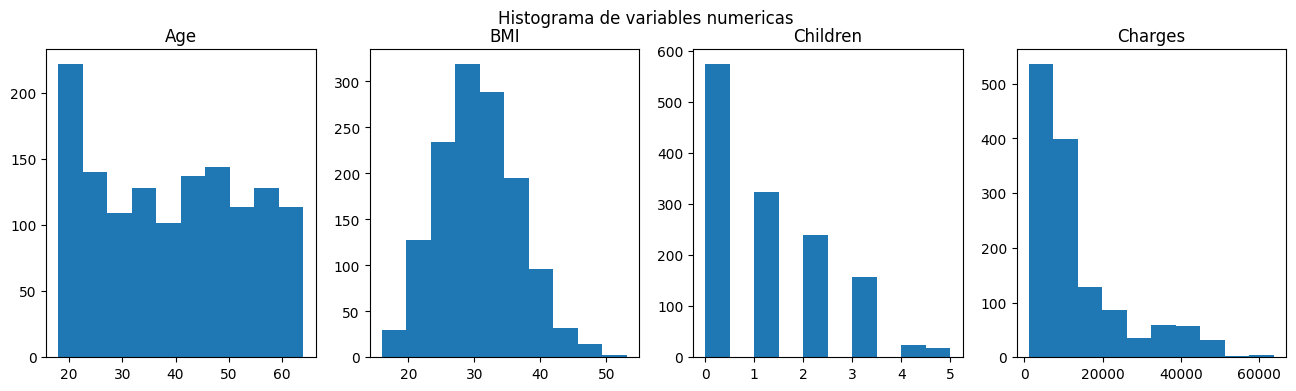

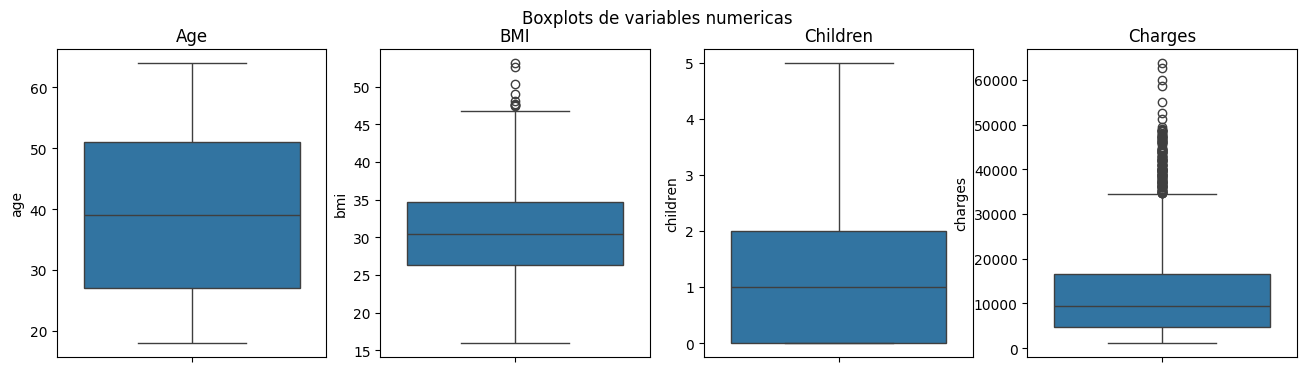


 medidas de tendencia central y dispersión



,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


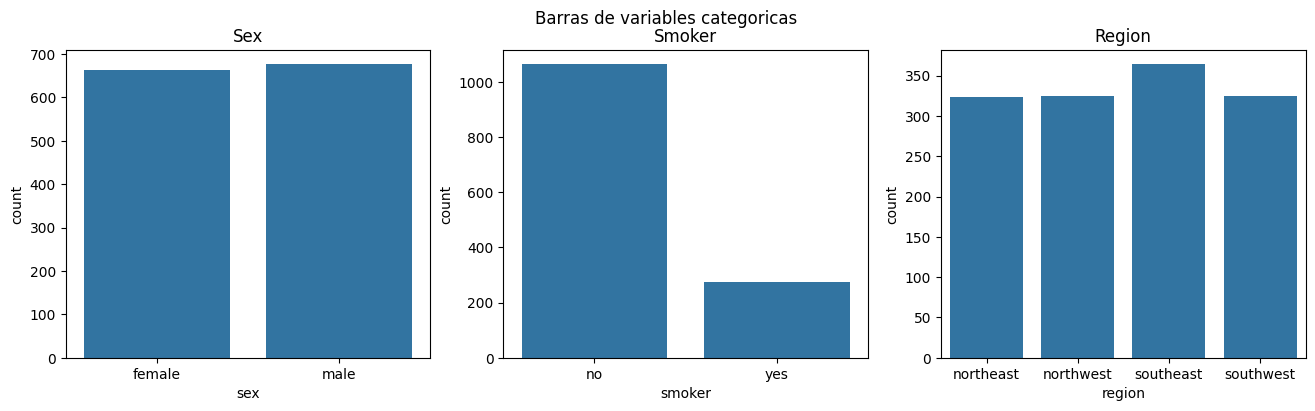

In [5]:
# Para variables numericas
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
axs[0].hist(df['age'], bins=10)
axs[0].set_title('Age')
axs[1].hist(df['bmi'], bins=10)
axs[1].set_title('BMI')
axs[2].hist(df['children'], bins=10)
axs[2].set_title('Children')
axs[3].hist(df['charges'], bins=10)
axs[3].set_title('Charges')
plt.suptitle('Histograma de variables numericas')
plt.show()

print("\n")
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
sns.boxplot(y=df['age'], ax=axs[0])
axs[0].set_title('Age')
sns.boxplot(y=df['bmi'], ax=axs[1])
axs[1].set_title('BMI')
sns.boxplot(y=df['children'], ax=axs[2])
axs[2].set_title('Children')
sns.boxplot(y=df['charges'], ax=axs[3])
axs[3].set_title('Charges')
plt.suptitle('Boxplots de variables numericas')
plt.show()

print("\n medidas de tendencia central y dispersión\n")
display(df[['age','bmi','children','charges']].describe())


# Para variables categoricas
print("\n")
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
sns.countplot(x='sex', data=df, ax=axs[0]).set(title='Sex')
sns.countplot(x='smoker', data=df, ax=axs[1]).set(title='Smoker')
sns.countplot(x='region', data=df, ax=axs[2]).set(title='Region')
fig.suptitle('Barras de variables categoricas')
plt.show()


#### **🔹 Paso 3: Matriz de Correlación**  
✅ Calcular la matriz de correlación **solo para variables numéricas**.  
✅ Generar un **mapa de calor** para visualizar relaciones.  
📌 **Pregunta:** ¿Qué variables están más correlacionadas con el target (`charges`)?  
La varible de  age (edad) es la que esta mas fuertemente correlacionada con charges(costos) de forma positiva con 0.3


               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


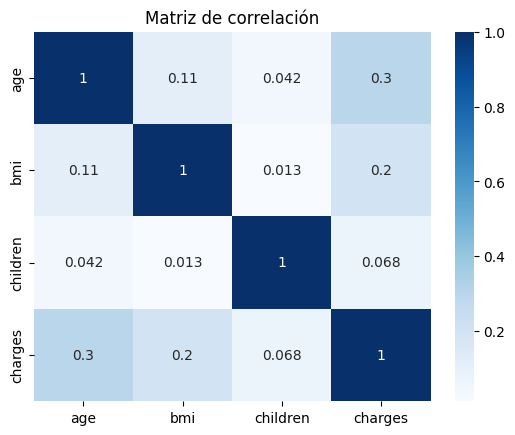

In [6]:
#Matriz correlacion
corr = df[['age', 'bmi', 'children', 'charges']].corr()
print(corr)

sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Matriz de correlación')
plt.show()


#### **🔹 Paso 4: Preprocesamiento**  
🔧 **Tareas:**  
1. Manejar valores faltantes con `SimpleImputer`.  
2. Codificar variables categóricas con `OneHotEncoder`.  
3. Estandarizar variables numéricas con `StandardScaler`.  
✅ Verificar que el dataset transformado no tenga valores nulos.  

*  El set de datos no contiene valores faltantes por lo que requiere imputacion.


In [7]:
#Valores faltantes
print(df.isnull().sum())

#Codificar y estandariza variables categoriascon OneHotEncoder
categoricas = ['sex', 'smoker', 'region']
numericas = ['age', 'bmi', 'children']
target = 'charges'

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numericas),              # Normaliza las variables numericas
    ("cat", OneHotEncoder(drop='first'), categoricas)  # Convierte categoricas a variables dummy
])

#Definir variables dependiente e independientes
X = df.drop(columns=[target])
y = df[target]

X_trans = preprocessor.fit_transform(X)

nuevasvar = preprocessor.get_feature_names_out()
print("Nuevas variables:", nuevasvar)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Nuevas variables: ['num__age' 'num__bmi' 'num__children' 'cat__sex_male' 'cat__smoker_yes'
 'cat__region_northwest' 'cat__region_southeast' 'cat__region_southwest']



#### **🔹 Paso 5: Modelado (Lasso y Ridge)**  
🎯 **Para cada modelo:**  
1. Ajustar el modelo con los hiperparámetros dados (`alpha=0.1` para Lasso, `alpha=1.0` para Ridge).  
2. Calcular **MSE** y **R²** para evaluar rendimiento.  
3. Analizar los coeficientes para identificar variables importantes.  

📌 **Pregunta:**  
- ¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?  
- ¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?  


In [9]:
#Modelo Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_trans, y)
y_pred_lasso = lasso.predict(X_trans)

mse_lasso = mean_squared_error(y, y_pred_lasso)
r2_lasso = r2_score(y, y_pred_lasso)

print(f"\nLasso - MSE: {mse_lasso:.3f}")
print(f"Lasso - R²: {r2_lasso:.3f}")

coef_lasso = pd.Series(lasso.coef_, index=nuevasvar)
print("\nCoeficientes Lasso:")
print(coef_lasso)


# Modelo Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_trans, y)
y_pred_ridge = ridge.predict(X_trans)

mse_ridge = mean_squared_error(y, y_pred_ridge)
r2_ridge = r2_score(y, y_pred_ridge)

print(f"\nRidge - MSE: {mse_ridge:.3f}")
print(f"Ridge - R²: {r2_ridge:.3f}")

coef_ridge = pd.Series(ridge.coef_, index=nuevasvar)
print("\nCoeficientes Ridge:")
print(coef_ridge)


Lasso - MSE: 36501893.681
Lasso - R²: 0.751

Coeficientes Lasso:
num__age                  3607.401538
num__bmi                  2067.477362
num__children              572.886518
cat__sex_male             -130.858174
cat__smoker_yes          23847.874359
cat__region_northwest     -351.296712
cat__region_southeast    -1033.232029
cat__region_southwest     -958.345589
dtype: float64

Ridge - MSE: 36503887.631
Ridge - R²: 0.751

Coeficientes Ridge:
num__age                  3604.096982
num__bmi                  2064.858647
num__children              573.073125
cat__sex_male             -124.200613
cat__smoker_yes          23737.991359
cat__region_northwest     -347.825073
cat__region_southeast    -1018.540799
cat__region_southwest     -952.384021
dtype: float64



#### **🔹 Paso 6: Verificación de Supuestos**  
📉 **Para cada modelo, verificar:**  
1. **Linealidad** (gráfico de residuos vs predicciones).  
2. **Normalidad de residuos** (QQ-Plot y test de Shapiro-Wilk).  
3. **Homocedasticidad** (test de Breusch-Pagan).  
4. **Multicolinealidad** (VIF > 10 indica problema).  

📌 **Pregunta:**  
- ¿Se cumplen los supuestos en ambos modelos?  
- Si hay heterocedasticidad, ¿cómo podría solucionarse?  

---------------------------
* NO se cumplen todos los supuestos, los residuos no estan distribuidos normal y  no estan alrededor de cero, no pasan la prueba de normalidad de SHapiro-Wilk, de igual manera no se cumple con el supuesto de Homocedasticidad, la variannza de los errores no es constante.

* Solo cumplen con el supuesto de no Multicolinealidad, no hay evidencia que indicque fuerte correalacion entre las variables independientes, los valoes de factor de inflacion son todos inferiores a 5.



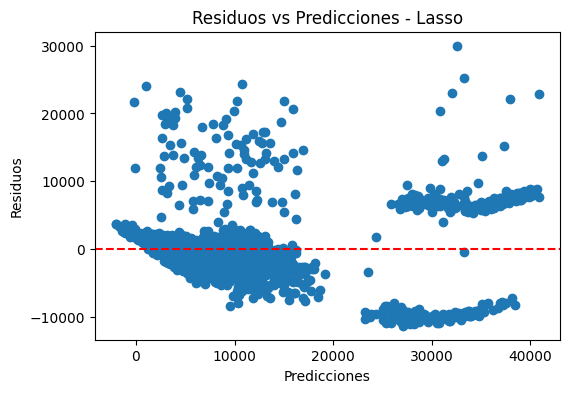

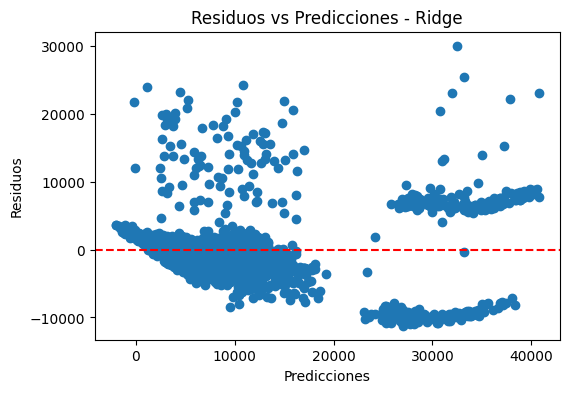

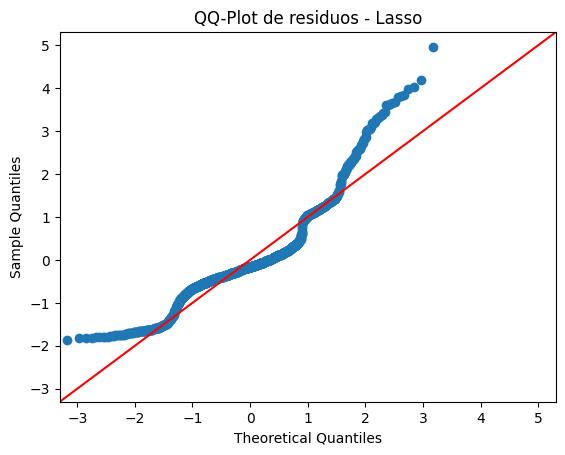

Shapiro-Wilk Lasso = 0.8989, p-value = 0.0000
Los residuos no son normales (p < 0.05).




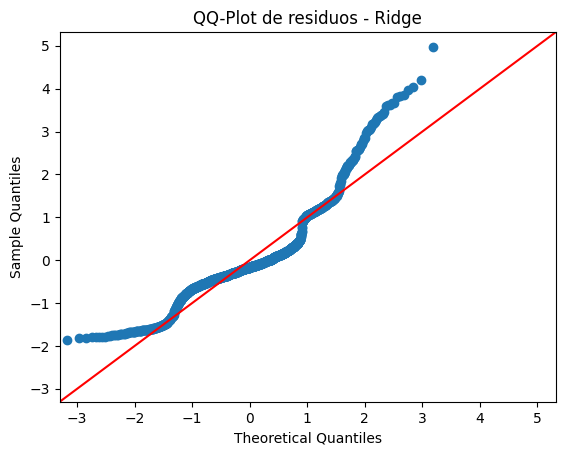

Shapiro-Wilk Ridge = 0.8980, p-value = 0.0000
 Los residuos no son normales (p < 0.05).

Breusch-Pagan Test - Lasso:
{'LM Statistic': np.float64(101.54949374483053), 'LM-Test p-value': np.float64(6.969997414556137e-24), 'F-Statistic': np.float64(109.72547866391912), 'F-Test p-value': np.float64(9.916421449772567e-25)}
Se detecta heterocedasticidad (p < 0.05).



Breusch-Pagan Test - Ridge:
{'LM Statistic': np.float64(102.33154505326219), 'LM-Test p-value': np.float64(4.696535787321637e-24), 'F-Statistic': np.float64(110.64047450903911), 'F-Test p-value': np.float64(6.473951271338249e-25)}
Se detecta heterocedasticidad (p < 0.05).
Valores VIF
                 Variable       VIF
0               num__age  1.015843
1               num__bmi  1.088673
2          num__children  1.003348
3          cat__sex_male  1.674830
4        cat__smoker_yes  1.228075
5  cat__region_northwest  1.223453
6  cat__region_southeast  1.357419
7  cat__region_southwest  1.215686


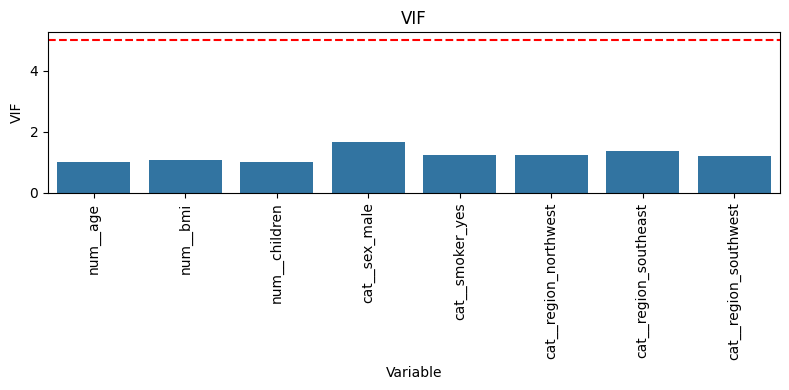

In [38]:
# Residuos
resid_lasso = y - y_pred_lasso
resid_ridge = y - y_pred_ridge

# 1 Linealidad
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_lasso, resid_lasso)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs Predicciones - Lasso')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(y_pred_ridge, resid_ridge)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs Predicciones - Ridge')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()
print("\n")



# 2 Normalidad
  #Lasso
sm.qqplot(resid_lasso, line='45', fit=True)
plt.title('QQ-Plot de residuos - Lasso')
plt.show()

stat, p_value = shapiro(resid_lasso)
print(f"Shapiro-Wilk Lasso = {stat:.4f}, p-value = {p_value:.4f}")
if p_value > 0.05:
    print("Los residuos parecen seguir una distribución normal.")
else:
    print("Los residuos no son normales (p < 0.05).")
print("\n")

  #Ridge
sm.qqplot(resid_ridge, line='45', fit=True)
plt.title('QQ-Plot de residuos - Ridge')
plt.show()

stat, p_value = shapiro(resid_ridge)
print(f"Shapiro-Wilk Ridge = {stat:.4f}, p-value = {p_value:.4f}")
if p_value > 0.05:
    print("Los residuos parecen seguir una distribución normal.")
else:
    print(" Los residuos no son normales (p < 0.05).")



# 3 Homocedasticidad
  #Lasso
exog_lasso = sm.add_constant(y_pred_lasso)
bp_test_lasso = het_breuschpagan(resid_lasso, exog_lasso)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print("\nBreusch-Pagan Test - Lasso:")
print(dict(zip(labels, bp_test_lasso)))
if bp_test_lasso[1] > 0.05:
    print("No se rechaza homocedasticidad.")
else:
    print("Se detecta heterocedasticidad (p < 0.05).")
print("\n")

  #Ridge
exog_ridge = sm.add_constant(y_pred_ridge)
bp_test_ridge = het_breuschpagan(resid_ridge, exog_ridge)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print("\nBreusch-Pagan Test - Ridge:")
print(dict(zip(labels, bp_test_ridge)))
if bp_test_ridge[1] > 0.05:
    print("No se rechaza homocedasticidad.")
else:
    print("Se detecta heterocedasticidad (p < 0.05).")



# 4 Multocolinealidad
vif = pd.DataFrame({
    'Variable': nuevasvar,
    'VIF': [variance_inflation_factor(X_trans, i) for i in range(X_trans.shape[1])]
})

print("Valores VIF\n",vif)

plt.figure(figsize=(8, 4))
sns.barplot(x='Variable', y='VIF', data=vif)
plt.axhline(y=5, color='red', linestyle='--')
plt.title('VIF')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




#### **🔹 Paso 7: Comparación Final**  
📊 **Analizar:**  
- ¿Qué modelo es más interpretable?  
- ¿Cuál reduce mejor el sobreajuste?  
- ¿Qué variables son más importantes en cada caso?  
------------------
* Para este caso el particular  y con los hiperparametros establecidos, no existe diferencia significativa en los resultados que estiman ambos modelos, son muy similares, ambos tienen la misma interpretacion

* Ambos menajan el mismo grado de sobreajuste

*  El modelo lazo no elimino varaibles.

* Para ambos modelos las variables mas importantes fueron la edad y la dummi (fumador si).




### **📌 Entrega de la Práctica**  
Al finalizar la practica, incluye un texto con los siguientes elementos
- Incluir **comentarios explicativos** en cada paso.  
- Responder las **preguntas planteadas** en celdas Markdown.  

🎯 **Criterios de Evaluación:**  
✔ **Correcto preprocesamiento** (manejo de nulos, escalado, encoding).  
✔ **Análisis visual y estadístico** (gráficos claros, interpretación de resultados).  
✔ **Validación de supuestos** (justificación de si se cumplen o no).  
✔ **Comparación crítica** entre Lasso y Ridge.  